In [45]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import os
import pickle

# Load Calibration Images 

In [17]:
CALIBRATION_DIR = glob.glob("../camera_cal/*.jpg")
print('CALIBRATION_DIR', CALIBRATION_DIR)

CALIBRATION_DIR ['../camera_cal/calibration5.jpg', '../camera_cal/calibration4.jpg', '../camera_cal/calibration6.jpg', '../camera_cal/calibration7.jpg', '../camera_cal/calibration3.jpg', '../camera_cal/calibration2.jpg', '../camera_cal/calibration1.jpg', '../camera_cal/calibration20.jpg', '../camera_cal/calibration19.jpg', '../camera_cal/calibration18.jpg', '../camera_cal/calibration15.jpg', '../camera_cal/calibration14.jpg', '../camera_cal/calibration16.jpg', '../camera_cal/calibration17.jpg', '../camera_cal/calibration13.jpg', '../camera_cal/calibration12.jpg', '../camera_cal/calibration10.jpg', '../camera_cal/calibration11.jpg', '../camera_cal/calibration9.jpg', '../camera_cal/calibration8.jpg']


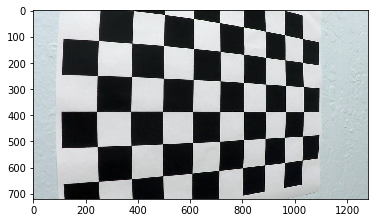

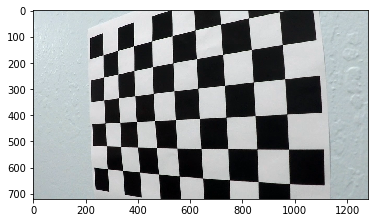

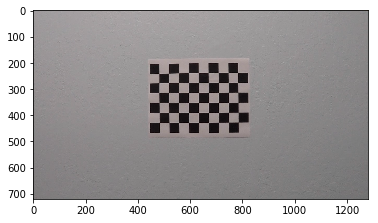

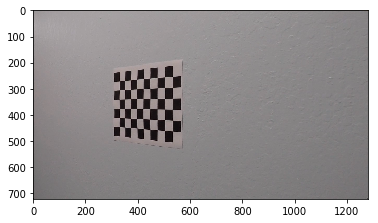

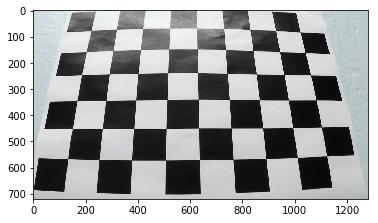

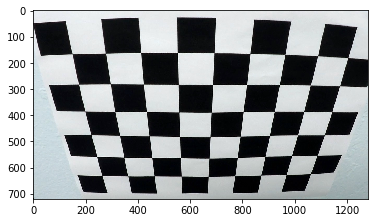

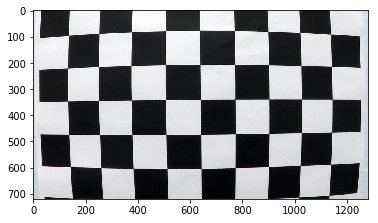

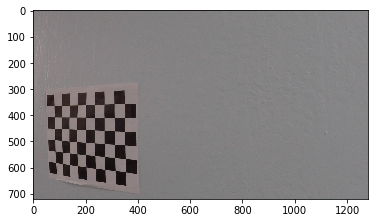

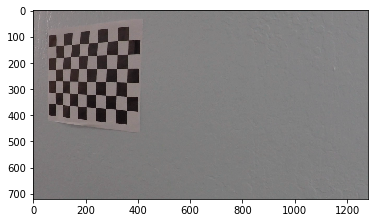

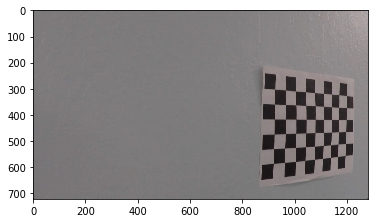

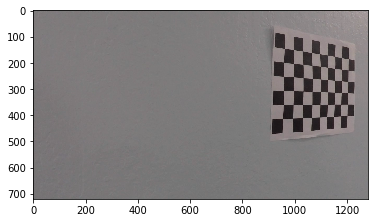

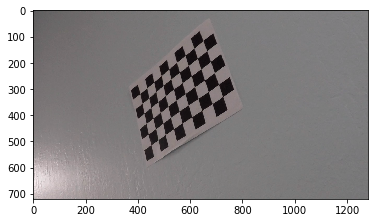

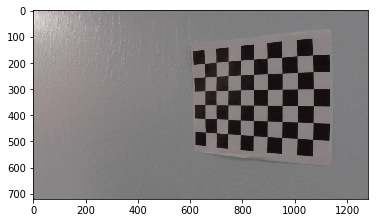

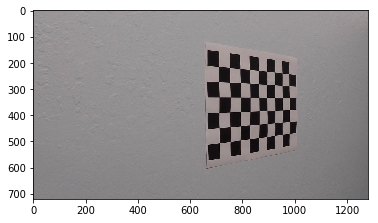

In [16]:
for img_link in CALIBRATION_DIR:
    img = cv2.imread(img_link)
    plt.imshow(img)
    plt.show()

# 2. Draw Corners for Chessboard 

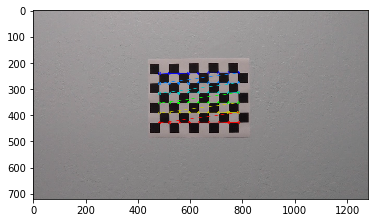

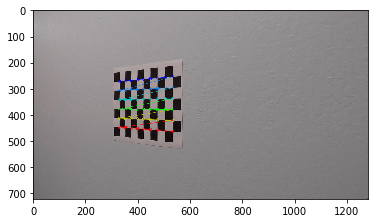

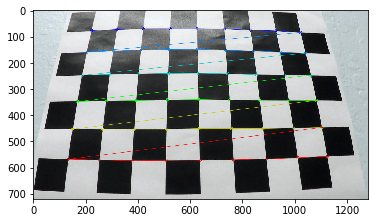

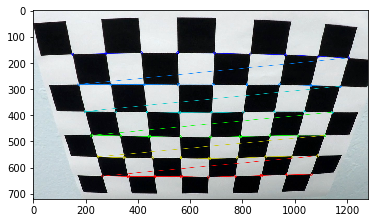

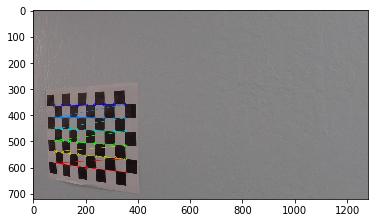

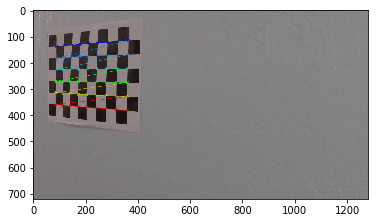

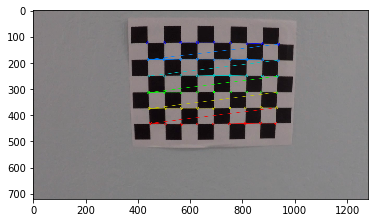

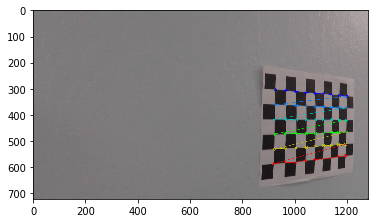

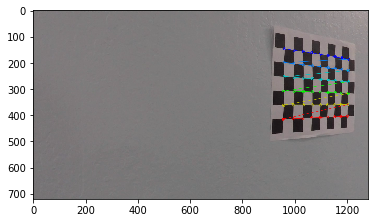

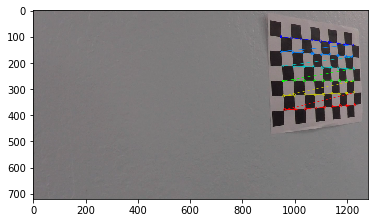

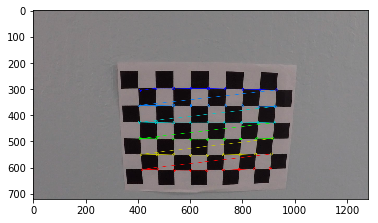

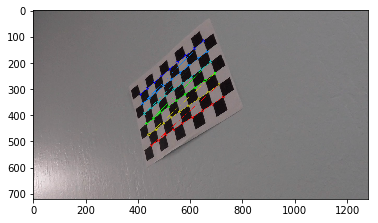

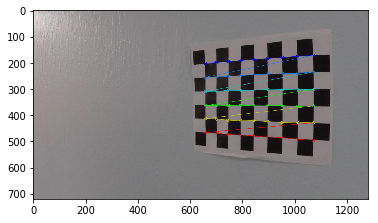

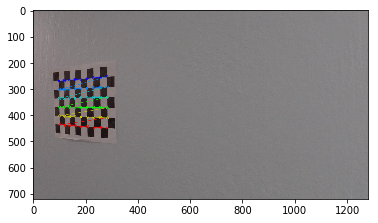

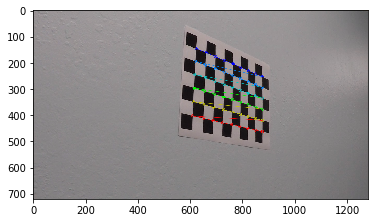

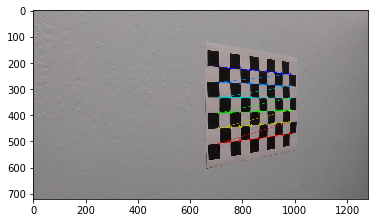

In [18]:
nx = 9
ny = 6
for img_link in CALIBRATION_DIR:
    img = cv2.imread(img_link)
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

    # If found, draw corners
    if ret == True:
        # Draw and display the corners
        cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
        plt.imshow(img)
        plt.show()

# 3. Get Object and Image Points

In [41]:
nx = 9
ny = 6
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp_template = np.zeros((ny * nx,3), np.float32)
objp_template[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

objpoints = []
imgpoints = []

for img_link in CALIBRATION_DIR:
    img = cv2.imread(img_link)
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

    # If found, draw corners
    if ret == True:
        # Draw and display the corners
        objpoints.append(objp_template)
        imgpoints.append(corners)

# 4. Create the Calibration Matrix 

In [42]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

# 5. Test on an Image 

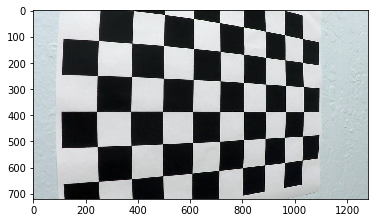

In [43]:
test_img_link = CALIBRATION_DIR[0]
test_img = cv2.imread(test_img_link)
plt.imshow(test_img)

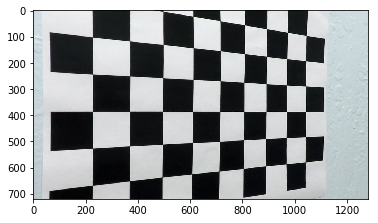

In [44]:
dst = cv2.undistort(test_img, mtx, dist, None, mtx)
plt.imshow(dst)

# 6. Store the Calibration Matrix 


In [48]:
with open("../camera_cal/calibration.pkl", 'wb') as f:
    obj = [ret, mtx, dist, rvecs, tvecs]
    pickle.dump(obj, f)

In [53]:
with open("../camera_cal/calibration.pkl", 'rb') as f:
    ret, mtx, dist, rvecs, tvecs = pickle.load(f)
    print('ret', ret)
    print('mtx', mtx)
    print('dist', dist)
    print('rvecs', rvecs)
    print('tvecs', tvecs)

ret 1.0298153371058978
mtx [[1.15777930e+03 0.00000000e+00 6.67111054e+02]
 [0.00000000e+00 1.15282291e+03 3.86128937e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
dist [[-0.24688775 -0.02373134 -0.00109842  0.00035108 -0.00258569]]
rvecs [array([[ 0.0174812 ],
       [ 0.02494375],
       [-0.0055652 ]]), array([[0.0188544 ],
       [0.63882068],
       [0.00862892]]), array([[-0.44950434],
       [-0.06457087],
       [-0.01889951]]), array([[ 0.63303262],
       [-0.04811255],
       [ 0.01736398]]), array([[-0.02312285],
       [ 0.38312144],
       [-0.00428373]]), array([[0.08577053],
       [0.38442841],
       [0.05432207]]), array([[ 0.18015125],
       [-0.05108958],
       [-0.0011928 ]]), array([[-0.02341591],
       [-0.48743707],
       [ 0.02025218]]), array([[ 0.05512564],
       [-0.5176842 ],
       [-0.00421231]]), array([[ 0.03796005],
       [-0.46390767],
       [-0.0563429 ]]), array([[ 0.21392517],
       [-0.06380936],
       [ 0.0114793 ]]), array([[-0